# Goal
Abby's dataset shows changes in sarcomere shortening (fluorescence microscopy FFT signal), adhesion force (FRET) and traction force (TFM). This code looks at the phase lag at which these signals are best correlated with one another. 

In [2]:
import numpy as np
import pandas as pd
import math
import seaborn as sns

# Plot parameters 
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'Tahoma',
        'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

color_map = 'cividis' #'inferno'

In [3]:
# Data imports and normalizing each column of each dataframe to be within 0 and 1 relative to itself.
shortening_df = -1*pd.read_excel('exampleData/sarc_shortening.xlsx')
shortening_normalized_df=(shortening_df-shortening_df.min())/(shortening_df.max()-shortening_df.min())

adhesion_df = pd.read_excel('exampleData/fret_force.xlsx')
adhesion_df = adhesion_df.drop(['Row Labels'], axis =1)
adhesion_normalized_df=(adhesion_df-adhesion_df.min())/(adhesion_df.max()-adhesion_df.min())

traction_df = pd.read_excel('exampleData/tfm_average_cell.xlsx')
traction_normalized_df=(traction_df-traction_df.min())/(traction_df.max()-traction_df.min())

# identification number for the cells where sarcomere shortening measurement was successful
cells = [4, 25] 

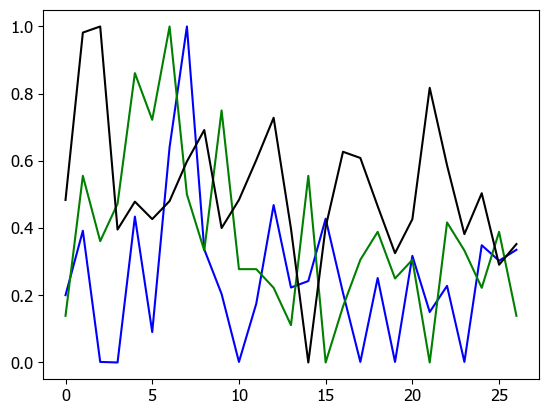

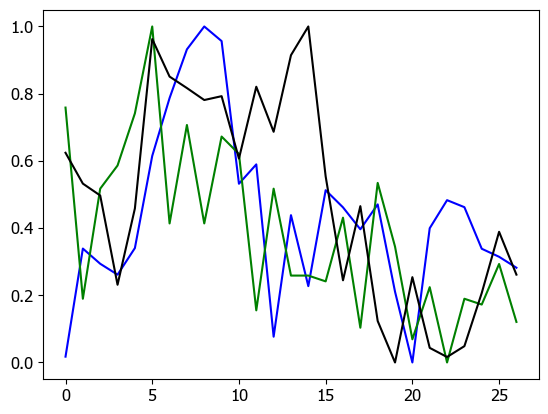

In [5]:

plt.plot(np.arange(0,len(shortening_df)), shortening_normalized_df['cell4'], c = 'blue')
plt.plot(np.arange(0,len(shortening_df)), adhesion_normalized_df['cell4'], c = 'green')
plt.plot(np.arange(0,len(shortening_df)), traction_normalized_df['Cell 4'], c = 'black')
plt.show()
plt.cla()

plt.plot(np.arange(0,len(shortening_df)), shortening_normalized_df['cell25'], c = 'blue')
plt.plot(np.arange(0,len(shortening_df)), adhesion_normalized_df['cell25'], c = 'green')
plt.plot(np.arange(0,len(shortening_df)), traction_normalized_df['Cell 25'], c = 'black')


In [120]:
# Compute phase lagged correlations for shortening and adhesion 
cell_corrs = {}
for cell_num in cells:
    corrs = []
    print(cell_num)
    a = shortening_normalized_df['cell'+str(cell_num)]
    b = adhesion_normalized_df['cell'+str(cell_num)]
    # trac_sig = traction_normalized_df['Cell '+str(cell_num)]

    for i in np.arange(0,len(shortening_normalized_df), 1): # Should set this up to generalize; perhaps try shifts of every 3
        if i == 0: 
            c = np.correlate(a,b,mode = 'valid')
        else:
            b1 = []
            b1 = np.concatenate((b[-i:len(b)],b[0:len(b)-i]))
            c = np.correlate(a,b1,mode = 'valid')
        corrs.append(c)
        
    cell_corrs[cell_num] = np.concatenate(corrs)

4
25


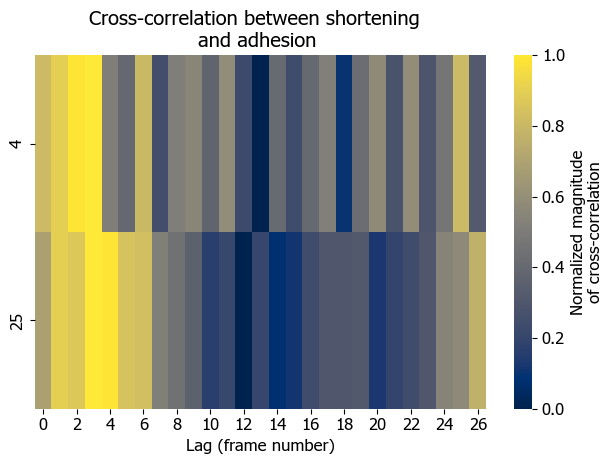

In [121]:
corrs_df = pd.DataFrame(cell_corrs)
norm_corrs = (corrs_df - corrs_df.min())/(corrs_df.max()-corrs_df.min())
norm_corrs.T

ax = sns.heatmap(norm_corrs.T, cmap = color_map, cbar_kws={'label': 'Normalized magnitude\nof cross-correlation'})
ax.set(xlabel='Lag (frame number)', title = 'Cross-correlation between ' + 'shortening ' + ' \nand ' + 'adhesion' + ' ')
plt.tight_layout()
#plt.savefig('phaseLaggedCorrelations_shortening_adhesion.png', dpi = 350)


In [122]:
# Compute phase lagged correlations for shortening and traction
cell_corrs = {}
for cell_num in cells:
    corrs = []
    print(cell_num)
    a = shortening_normalized_df['cell'+str(cell_num)]
    #b = adhesion_normalized_df['cell'+str(cell_num)]
    b = traction_normalized_df['Cell '+str(cell_num)]

    for i in np.arange(0,len(shortening_normalized_df), 1): # Should set this up to generalize; perhaps try shifts of every 3
        if i == 0: 
            c = np.correlate(a,b,mode = 'valid')
        else:
            b1 = []
            b1 = np.concatenate((b[-i:len(b)],b[0:len(b)-i]))
            c = np.correlate(a,b1,mode = 'valid')
        corrs.append(c)
        
    cell_corrs[cell_num] = np.concatenate(corrs)



4
25


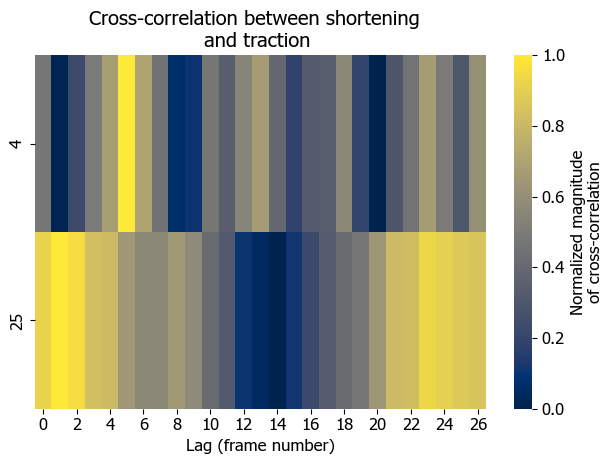

In [123]:
# Plot phase lagged correlations for shortening and traction
corrs_df = pd.DataFrame(cell_corrs)
norm_corrs = (corrs_df - corrs_df.min())/(corrs_df.max()-corrs_df.min())
norm_corrs.T

ax = sns.heatmap(norm_corrs.T, cmap = color_map, cbar_kws={'label': 'Normalized magnitude\nof cross-correlation'})
ax.set(xlabel='Lag (frame number)', title = 'Cross-correlation between ' + 'shortening ' + ' \nand ' + 'traction' + ' ')
plt.tight_layout()
#plt.savefig('phaseLaggedCorrelations_shortening_traction.png', dpi = 350)


In [124]:
# Compute phase lagged correlations for shortening and traction
cell_corrs = {}
for cell_num in cells:
    corrs = []
    print(cell_num)
    #a = shortening_normalized_df['cell'+str(cell_num)]
    a = adhesion_normalized_df['cell'+str(cell_num)]
    b = traction_normalized_df['Cell '+str(cell_num)]

    for i in np.arange(0,len(shortening_normalized_df), 1): # Should set this up to generalize; perhaps try shifts of every 3
        if i == 0: 
            c = np.correlate(a,b,mode = 'valid')
        else:
            b1 = []
            b1 = np.concatenate((b[-i:len(b)],b[0:len(b)-i]))
            c = np.correlate(a,b1,mode = 'valid')
        corrs.append(c)
        
    cell_corrs[cell_num] = np.concatenate(corrs)


4
25


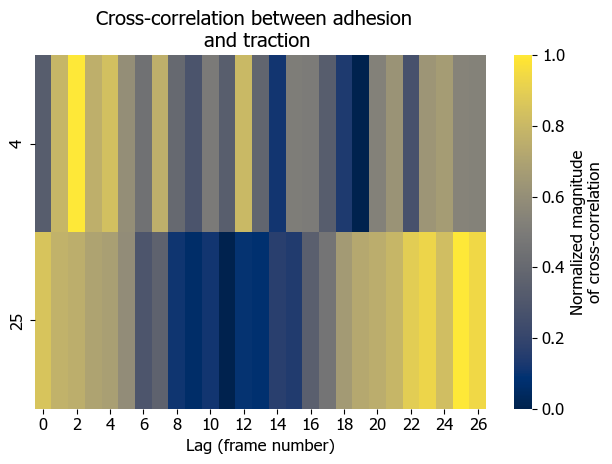

In [125]:
# Plot phase lagged correlations for shortening and traction
corrs_df = pd.DataFrame(cell_corrs)
norm_corrs = (corrs_df - corrs_df.min())/(corrs_df.max()-corrs_df.min())
norm_corrs.T

ax = sns.heatmap(norm_corrs.T, cmap = color_map, cbar_kws={'label': 'Normalized magnitude\nof cross-correlation'})
ax.set(xlabel='Lag (frame number)', title = 'Cross-correlation between ' + 'adhesion ' + ' \nand ' + 'traction' + ' ')
plt.tight_layout()
#plt.savefig('phaseLaggedCorrelations_shortening_traction.png', dpi = 350)
